## Data Processing

In [91]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [82]:
# import data set
energy_data = pd.read_csv('energey_efficiency_data.csv')

In [83]:
# view data set
energy_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28,NaN,NaN


In [84]:
# drop extraneous columns and rename columns
energy_data = energy_data.drop(['Unnamed: 10', 'Unnamed: 11'], axis=1)
energy_data.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']

In [85]:
# delete rows with missing data
energy_data = energy_data.dropna()

In [86]:
# view updated data set
energy_data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [87]:
# break data into independent and dependent variables
X = energy_data.iloc[:, :-1].values
y = energy_data.iloc[:, -2:].values

In [88]:
# split data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [89]:
# feature scaling 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
y_train_sc = sc_y.fit_transform(y_train)

## Visialize Dependent Data

[]

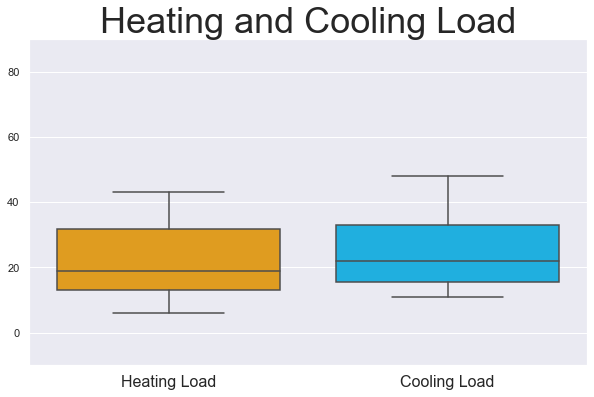

In [151]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10,6)})
ybox = sns.boxplot(data=y, showfliers=False, palette= ['orange','deepskyblue'])

ybox.set_title('Heating and Cooling Load', fontsize=36)
ybox.set_xticklabels(['Heating Load','Cooling Load'], size=16)
ybox.set_ylim(-10,90)

plt.plot()

## Linear Regression 

In [36]:
# train the linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_test)
r2_line_reg = r2_score(y_test, y_pred)
print(r2_line_reg)

0.9788845283003533


## k-Nearest Neighbors

In [73]:
# train the k-nearest neighbors model
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [74]:
# find r^2 value
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_test)
r2_neigh = r2_score(y_test, y_pred)
print(r2_neigh)

0.9713192588148267


## Decision Tree

In [75]:
# train the desicion tree model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [76]:
# find r^2 value
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_test)
r2_tree = r2_score(y_test, y_pred)
print(r2_tree)

0.9816908418756738


## Random Forrest

In [78]:
# train the random forest model for y1, heating load
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [79]:
# find r^2 value
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_test)
r2_forest = r2_score(y_test, y_pred)
print(r2_forest)

0.9875499475347642
